In [1]:
import random
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from collections import Counter

transactions = pd.read_csv('/kaggle/input/h-and-m-personalized-fashion-recommendations/transactions_train.csv')
sample_submission = pd.read_csv('/kaggle/input/h-and-m-personalized-fashion-recommendations/sample_submission.csv')
# /kaggle/input/h-and-m-personalized-fashion-recommendations/sample_submission.csv
# /kaggle/input/h-and-m-personalized-fashion-recommendations/articles.csv
# /kaggle/input/h-and-m-personalized-fashion-recommendations/transactions_train.csv
# /kaggle/input/h-and-m-personalized-fashion-recommendations/customers.csv

# FIXME : does not work
plt.rcParams["figure.figsize"] = (15,5)

In [2]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [3]:
sample_submission.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


# Data analysis

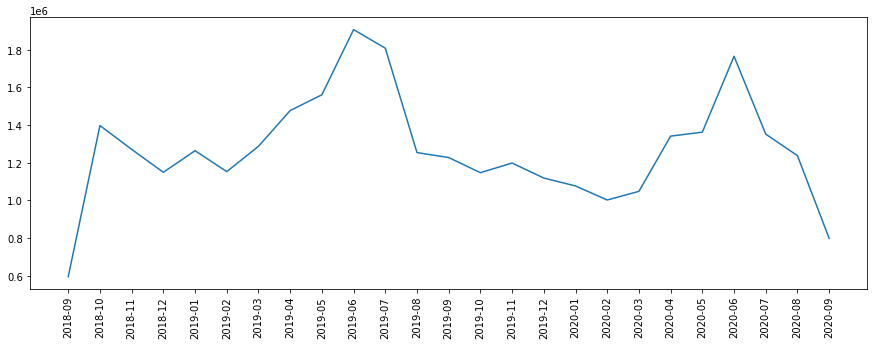

In [4]:
# Sold products over the years
df = transactions
df['year_month'] = df['t_dat'].apply(lambda x : x.split('-')[0]+'-'+x.split('-')[1])
df = df.groupby(['year_month']).count().reset_index()
_ = plt.plot(df['year_month'], df['t_dat'])
_ = plt.xticks(rotation=90)

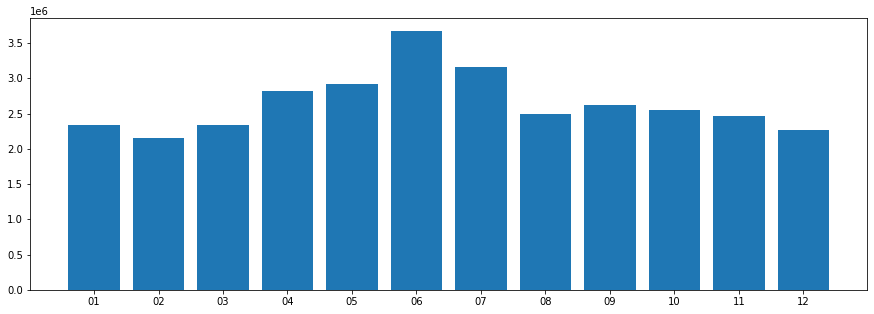

In [5]:
# Sold product each month
df = transactions
df['month'] = df['t_dat'].apply(lambda x : x.split('-')[1])
df = df.groupby(['month']).count().reset_index()
_ = plt.bar(df['month'], df['t_dat'], align='center')

       article_id  customer_id
53832   706016001        50287
53833   706016002        35043
1711    372860001        31718
24808   610776002        30199
70124   759871002        26329
...           ...          ...
8205    521266001            1
36666   651538001            1
8211    521302001            1
36710   651645003            1
13340   557727001            1

[104547 rows x 2 columns]


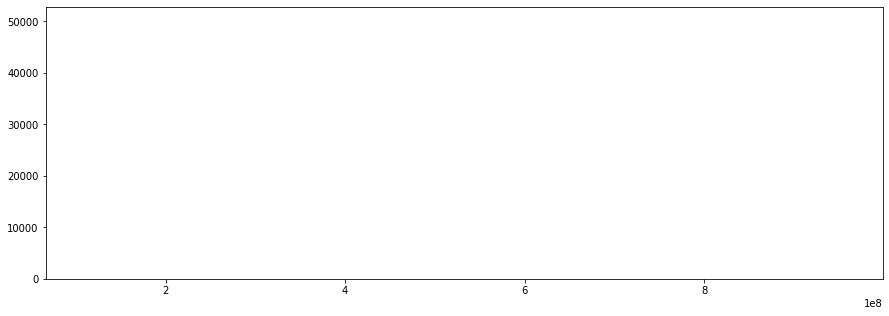

In [6]:
# Top products
df = transactions.groupby(['article_id']).count().reset_index()[["article_id", "customer_id"]].sort_values(["customer_id"], ascending=False)
print(df)
_ = plt.bar(df['article_id'], df['customer_id'], align='center')

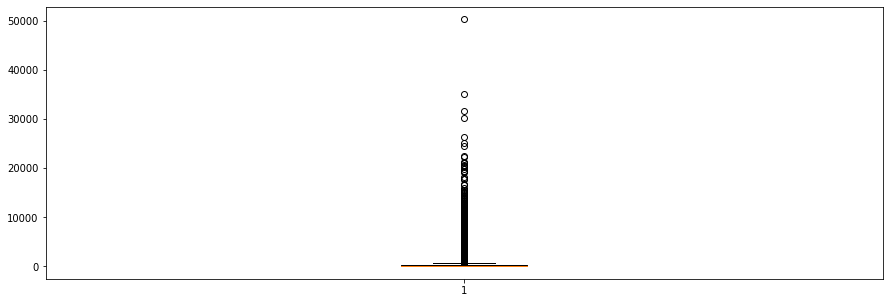

In [7]:
_ = plt.boxplot(df['customer_id'])

In [8]:
transactions

,t_dat,customer_id,article_id,price,sales_channel_id,year_month,month
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,2018-09,09
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,2018-09,09
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2018-09,09
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,2018-09,09
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,2018-09,09
...,...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,2020-09,09
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,2020-09,09
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,2020-09,09
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,2020-09,09


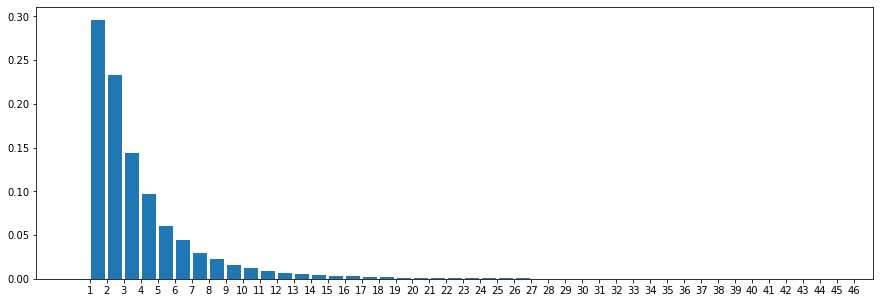

In [9]:
# Number of products by basket (considering one day = one basket as we do not have order_id)
transactions_gb = transactions.groupby(['t_dat', 'customer_id'])['article_id'].apply(list).reset_index()  
transactions_gb["len_basket"] = transactions_gb["article_id"].apply(lambda x: len(x))
transactions_gb = transactions_gb.sort_values(["len_basket"])

# Taking off outliers
transactions_gb_t = transactions_gb[:len(transactions_gb['len_basket'])-2000]

# Plot
_ = plt.hist(transactions_gb_t['len_basket'], density=True, bins=range(max(list(set(transactions_gb_t['len_basket'])))), rwidth=0.8)
_ = plt.xticks(list(set(transactions_gb_t['len_basket'])))

# Cleaning + create train and test dataset

In [10]:
# Truncate transactions since the data is too large for Kaggle cluster
transactions = transactions[transactions["t_dat"]>='2020-07-01']

In [11]:
# Considering each article_id as str
transactions['article_id'] = transactions['article_id'].astype(str)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
# Splitting train and test as 30%
test_set = 0.3
train_set = (1-test_set)
split = int(transactions.shape[0]*train_set)

transactions_train = transactions.sort_values('t_dat').iloc[:split]
transactions_test = transactions.sort_values('t_dat').iloc[split:]
print("Train set size :", transactions_train.shape[0])
print("Test set size :", transactions_test.shape[0])

Train set size : 2370874
Test set size : 1016089


# Baseline : Best sellers recommender

Our Baseline will be the well known best sellers.

In [13]:
class BestSeller():
    """FIXME"""
    def __init__(self):
        """FIXME"""
        pass
    
    def fit(self, X):
        """FIXME"""
        self.X_occur = Counter(list(X['article_id']))
        self.best_sellers_10 = [article_id for (article_id, occ) in self.X_occur.most_common(10)]
        return self
    
    def predict(self, basket, k=10):
        """FIXME"""
        if k==10:
            return self.best_sellers_10
        else:
            best_sellers = [article_id for (article_id, occ) in self.X_occur.most_common(k)]
            return best_sellers

In [14]:
bs_model = BestSeller()
bs_model.fit(transactions_train)

In [15]:
bs_model.predict([])

['706016001',
 '372860002',
 '610776002',
 '751471001',
 '730683050',
 '760084003',
 '759871002',
 '866383006',
 '464297007',
 '610776001']

# Cosine Similarity

Cosine similarity is a measure of similarity that can be used to get the similarity of two objects. It uses the cosine value between two vectors to compute the similarity of two data points. As the distances between the vectors increases, the similiraty reduces.

In [16]:
from math import sqrt

class CosineSim():
    """FIXME"""
    def __init__(self):
        """FIXME"""
        pass
    
    def _get_l_of_two_from_l(self, l):
        """FIXME"""
        # Dropping duplicates to avoid having more co-occur than occur
        l = list(set(l))
        if len(l)>1:
            l_of_two = []
            for i in range(0,len(l)):
                for j in range(i+1,len(l)):
                    if int(l[i])<int(l[j]):
                        l_of_two.append(f"{l[i]}|{l[j]}")
                    else:
                        l_of_two.append(f"{l[j]}|{l[i]}")
            return l_of_two
        return None
    
    def _get_frequency(self, article_id, counter_occur_article_id):
        """FIXME"""
        return counter_occur_article_id[article_id]
    
    def _get_co_occ_frequency(self, article_id_a, article_id_b, counter_co_occ_article_id):
        """FIXME"""
        if int(article_id_a) < int(article_id_b):
            str_co_occ = article_id_a + '|' + article_id_b
        else:
            str_co_occ = article_id_b + '|' + article_id_a
        return counter_co_occ_article_id[str_co_occ]
    
    def _get_cosine_sim(self, freq_a, freq_b, co_occ_freq):
        """FIXME"""
        return (co_occ_freq/sqrt(freq_a*freq_b))
        
    def fit(self, X, top_n=200, threshold=0.005):
        """FIXME"""        
        # Keeping only top N articles
        start_time = time.time()
        counter_article_id = Counter(X['article_id'])
        list_top_n = sorted(counter_article_id, key=counter_article_id.get, reverse=True)[:top_n]
        X = X[X['article_id'].isin(list_top_n)]
        print("--- %s seconds ---" % (time.time() - start_time))
        
        # Getting baskets
        start_time = time.time()
        X_grouped = X.groupby(['t_dat', 'customer_id'])['article_id'].apply(list).reset_index()
        print("--- %s seconds ---" % (time.time() - start_time))
        
        # Getting frequencies of article_ids
        start_time = time.time()
        l_baskets_len2 = list(X_grouped[X_grouped['article_id'].map(len) >1]['article_id'])
        l_baskets_len2_flat_list = [x for xs in l_baskets_len2 for x in xs]
        counter_occur_article_id = Counter(l_baskets_len2_flat_list)
        print("--- %s seconds ---" % (time.time() - start_time))

        # Getting co-occur frequencies of article_ids
        start_time = time.time()
        l_co_occur_article_id = []
        for basket in l_baskets_len2:
            l_of_two = self._get_l_of_two_from_l(basket)
            if l_of_two:
                l_co_occur_article_id += l_of_two

        counter_co_occ_article_id = Counter(l_co_occur_article_id)
        print("--- %s seconds ---" % (time.time() - start_time))
        
        # Creating pandas dataframe
        start_time = time.time()
        l_article_id_a = [i.split('|', 1)[0] for i in l_co_occur_article_id]
        l_article_id_b = [i.split('|', 1)[1] for i in l_co_occur_article_id]
        df_cosine = pd.DataFrame()
        df_cosine['article_id_a'] = l_article_id_a
        df_cosine['article_id_b'] = l_article_id_b
        print("--- %s seconds ---" % (time.time() - start_time))
        
        start_time = time.time()
        df_cosine['freq_a'] = df_cosine['article_id_a'].apply(lambda x : self._get_frequency(x, counter_occur_article_id))
        print("--- %s seconds ---" % (time.time() - start_time))
        
        start_time = time.time()
        df_cosine['freq_b'] = df_cosine['article_id_b'].apply(lambda x : self._get_frequency(x, counter_occur_article_id))
        print("--- %s seconds ---" % (time.time() - start_time))
        
        start_time = time.time()
        df_cosine['co_occ_freq'] = df_cosine.apply(lambda x: self._get_co_occ_frequency(x.article_id_a, x.article_id_b, counter_co_occ_article_id), axis=1)
        print("--- %s seconds ---" % (time.time() - start_time))
        
        start_time = time.time()
        df_cosine['cosine_sim'] = df_cosine.apply(lambda x: self._get_cosine_sim(x.freq_a, x.freq_b, x.co_occ_freq), axis=1)
        print("--- %s seconds ---" % (time.time() - start_time))
        
        df_cosine = df_cosine.sort_values('cosine_sim', ascending=False)
        
        # Filtering with threshold
        self.df_cosine = df_cosine[df_cosine["cosine_sim"]>threshold]

        return self
    
    def predict(self, basket, k=10, strat='mean'):
        """FIXME"""
        df = self.df_cosine[(self.df_cosine['article_id_a'].isin(basket)) & (~self.df_cosine['article_id_b'].isin(basket))]
        
        if strat=='mean':
            result = list(df[['article_id_b', 'cosine_sim']].groupby(['article_id_b']).mean().reset_index()['article_id_b'])[:k]
        elif strat=='max':
            result = list(df[['article_id_b', 'cosine_sim']].groupby(['article_id_b']).max().reset_index()['article_id_b'])[:k]
        else:
            result = []
        return result

In [17]:
# FIXME : Optimize for loops, taking ages to run
cs_model = CosineSim().fit(transactions_train, top_n=500)

--- 1.7116584777832031 seconds ---
--- 7.496165752410889 seconds ---
--- 0.23682165145874023 seconds ---
--- 0.5799398422241211 seconds ---
--- 0.28242945671081543 seconds ---
--- 0.19006919860839844 seconds ---
--- 0.18467950820922852 seconds ---
--- 6.993905782699585 seconds ---
--- 9.155237197875977 seconds ---


In [18]:
cs_model.predict(['610776001'])

['610776002',
 '610776068',
 '610776071',
 '610776072',
 '610776074',
 '610776083',
 '624486001',
 '624486064',
 '673396002',
 '678942001']

# ALS

In [19]:
# !pip install pyspark > /dev/null

In [20]:
# import pyspark

# from pyspark import SparkContext, SparkConf
# from pyspark.sql import SQLContext, SparkSession

In [21]:
# conf = SparkConf().set("spark.ui.port", "4050") \
#                   .set('spark.executor.memory', '9G') \
#                   .set('spark.driver.memory', '7G') \
#                   .set('spark.sql.autoBroadcastJoinThreshold', '-1')

# sc = pyspark.SparkContext(conf=conf)
# spark = SparkSession.builder.getOrCreate()

In [22]:
# from pyspark.ml.recommendation import ALS, ALSModel

In [23]:
# customer_map = transactions[["customer_id"]].drop_duplicates().reset_index(drop=True)
# customer_map["USER"] = customer_map.index

# item_map = df[["article_id"]].drop_duplicates().reset_index(drop=True)
# item_map["ITEM"] = item_map.index

# customer_map_dict = dict(zip(customer_map['USER'].values, customer_map['customer_id'].values))
# item_map_dict = dict(zip(item_map['ITEM'].values, item_map['article_id'].values))

In [24]:
# transactions_train['article_id'] = transactions_train['article_id'].astype(str)
# transactions_train.info()

In [25]:
# transactions_train_als = (
#         transactions_train
#         .merge(customer_map, on="customer_id", how="inner")
#         .merge(item_map, on="article_id", how="inner")
#     )
# transactions_train_als["rating"] = 1

In [26]:
# transactions_train_als.head()

In [27]:
# mod = 10000000
# transactions_train_als = transactions_train[["customer_id", "article_id"]].head(1000)
# transactions_train_als["rating"] = 1
# transactions_train_als['customer_id_hash'] = transactions_train_als['customer_id'].apply(lambda x : hash(x) % mod)
# transactions_train_als['article_id_hash'] = transactions_train_als['article_id'].apply(lambda x : hash(x) % mod)

In [28]:
# transactions_train_als_spark = spark.createDataFrame(transactions_train_als) 

In [29]:
# transactions_train_als_spark.show()

In [30]:
# als = ALS(userCol="customer_id_hash", itemCol="article_id_hash", ratingCol="rating", coldStartStrategy="drop")

# # param_grid = ParamGridBuilder().addGrid(als.rank, [25]) \
# #                                .addGrid(als.regParam, [0.1, 0.15]) \
# #                                .addGrid(als.maxIter, [10]) \
# #                                .build()

In [31]:
# model = als.fit(transactions_train_als_spark)

In [32]:
# transactions_test_als = transactions_test[["customer_id", "article_id"]].head(1000)
# #transactions_test_als["rating"] = 1
# transactions_test_als['customer_id_hash'] = transactions_test_als['customer_id'].apply(lambda x : hash(x) % mod)
# transactions_test_als['article_id_hash'] = transactions_test_als['article_id'].apply(lambda x : hash(x) % mod)
# transactions_test_als_spark = spark.createDataFrame(transactions_test_als) 

In [33]:
# predictions = model.transform(transactions_test_als_spark)

In [34]:
# predictions.show()

In [35]:
# !pip install --upgrade implicit

In [36]:
# import implicit

In [37]:
# model = implicit.als.AlternatingLeastSquares(factors=10, iterations=2)
# model.fit(coo_train)

In [38]:
# transactions_train.head()

In [39]:
# transactions_train_als = transactions_train[["customer_id", "article_id"]].head(1000)
# transactions_train_als["rating"] = 1

In [40]:
# !pip install pyspark

In [41]:
# import pyspark

# from pyspark.ml.recommendation import ALS

# als = ALS(maxIter=5, regParam=0.01, userCol="customer_id", itemCol="article_id", ratingCol="rating", coldStartStrategy="drop")
# # model = als.fit(transactions_train_als)

In [42]:
# from pyspark.ml.recommendation import ALS

# als = ALS(maxIter=10, regParam=1, userCol="USER", itemCol="ITEM", ratingCol="RATING", coldStartStrategy="drop", implicitPrefs=True, alpha=100, rank=200, seed=1)

# Evaluating recommenders

In [43]:
def is_predicted(customer_id, order, model, k, debug=False):
    """FIXME"""
    if debug:
        print("##")
        print("order:", order)
    order_ = order.copy()
    hidden_article_id = order_.pop(random.randrange(len(order_)))
    visible_order = order_
    
    start_time = time.time()
    predictions = model.predict(visible_order, k)
    if debug:
        print(time.time() - start_time)
    
    if debug:
        print("visible_order:", visible_order)
        print("predictions:", predictions)
        print("hidden_article_id:", hidden_article_id)
    
    if hidden_article_id in predictions:
        if debug:
            print(1)
        return 1
    else:
        if debug:
            print(0)
        return 0

In [44]:
def history_basket_performance(X, model, k=10):
    """FIXME"""
    # Grouping to have orders by day
    X_orders = X.groupby(['t_dat', 'customer_id'])['article_id'].apply(list).reset_index()    
    
    # Keeping only orders where we can hide at least one article and have at least one item in our basket
    X_orders['is_long_enough'] = X_orders['article_id'].apply(lambda x: 1 if(len(x)>1) else 0)
    X_orders = X_orders[X_orders['is_long_enough']==1]
        
    v_is_predicted = np.vectorize(lambda x, y, model, k: is_predicted(x, y, model, k))

    X_orders['predicted'] = v_is_predicted(X_orders.customer_id, X_orders.article_id, model, k)

    is_predicted_count = X_orders[X_orders['predicted']==1].shape[0]
    count = X_orders.shape[0]
    
    return (count, is_predicted_count/count)

In [45]:
history_basket_performance(transactions_test.head(1000), bs_model)

(230, 0.008695652173913044)

In [46]:
history_basket_performance(transactions_test.head(1000), cs_model)

(230, 0.02608695652173913)

In [47]:
# (205, 0.24878048780487805)

# Evaluating top_n in cosine_sim

In [48]:
# [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
l_top_n = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
l_perf = []
for top_n in l_top_n:
    print("##")
    print(top_n)
    cs_model = CosineSim().fit(transactions_train, top_n)
    perf = history_basket_performance(transactions_test.head(3000), cs_model)
    l_perf.append(perf[1])
    print(perf)

##
100
--- 0.9826288223266602 seconds ---
--- 3.246757745742798 seconds ---
--- 0.09618401527404785 seconds ---
--- 0.11704850196838379 seconds ---
--- 0.0447993278503418 seconds ---
--- 0.03164982795715332 seconds ---
--- 0.03054952621459961 seconds ---
--- 1.0298912525177002 seconds ---
--- 1.3421401977539062 seconds ---
(688, 0.00436046511627907)
##
200
--- 0.9356236457824707 seconds ---
--- 6.27182936668396 seconds ---
--- 0.14528226852416992 seconds ---
--- 0.23481297492980957 seconds ---
--- 0.09647989273071289 seconds ---
--- 0.06731891632080078 seconds ---
--- 0.07179093360900879 seconds ---
--- 2.4506988525390625 seconds ---
--- 3.2142317295074463 seconds ---
(688, 0.005813953488372093)
##
300
--- 1.015989065170288 seconds ---
--- 5.797179222106934 seconds ---
--- 0.18752384185791016 seconds ---
--- 0.3610951900482178 seconds ---
--- 0.16287541389465332 seconds ---
--- 0.11533546447753906 seconds ---
--- 0.10748052597045898 seconds ---
--- 4.127013921737671 seconds ---
--- 8.7

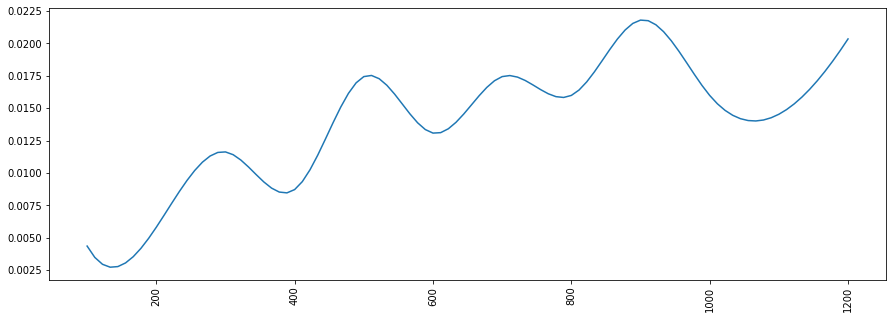

In [49]:
from scipy.interpolate import make_interp_spline

x = np.array(l_top_n)
y = np.array(l_perf)

X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers over a specified interval.
X_ = np.linspace(x.min(), x.max(), 100)
Y_ = X_Y_Spline(X_)

_ = plt.plot(X_, Y_)
_ = plt.xticks(rotation=90)